## 泰坦尼克幸存者预测
泰坦尼克号的沉没是世界上最严重的海难事故之一，今天我们通过分类树模型来预测一下哪些人可能成为幸存者。 数据集来着https://www.kaggle.com/c/titanic，数据集会随着代码一起提供给大家，大家可以在下载页面拿到， 或者到群中询问。数据集包含两个csv格式文件，data为我们接下来要使用的数据，test为kaggle提供的测试集。


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head(2) #默认5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
#筛选特征
data.drop(['Cabin','Ticket','Name'],inplace=True,axis=1) #inplace=True 覆盖原表 axis=1 删除列

In [6]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
#处理缺失值
data['Age'] = data['Age'].fillna(data['Age'].mean()) #fillna 填补缺失值 年龄可以使用平均值

In [8]:
data = data.dropna() #删除有缺失值的行

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [14]:
#将三分类变量转换为数值型变量
labels = data['Embarked'].unique().tolist() #unique 值不超过10个并且相互没有联系 可以用数字代替
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))    # 'S' ---> labels.index('S')

In [16]:
#将二分类变量转换为数值型变量 #astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这
#个方式可以很便捷地将二分类特征转换为0~1

data.loc[:,"Sex"] = (data["Sex"]== "male").astype("int")

In [17]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [25]:
#提取标签和特征矩阵
X = data.iloc[:,data.columns != 'Survived']
y = data.iloc[:,data.columns == 'Survived']

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)

In [26]:
#修正测试集和训练集的索引
for i in [Xtrain,Xtest,Ytrain,ytest]:
    i.index = range(i.shape[0])

In [30]:
#导入模型，粗略跑一下查看结果
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, ytrain)
score = clf.score(Xtest,ytest)
score

0.6479400749063671

In [31]:
score_ = cross_val_score(clf,X,y,cv=10).mean()
score_

0.5995020429009192

0.7019790602655771


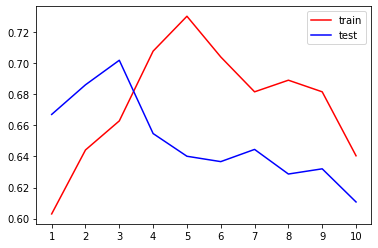

In [42]:
#在不同max_depth下观察模型的拟合状况
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 #,criterion='entropy'
                                )
    clf = clf.fit(Xtrain,ytrain)
    score_tr = clf.score(Xtest,ytest)
    tr.append(score_tr)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    te.append(score_te)
    
print(max(te))

plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [47]:
#用网格搜索调整参数,能够同时调整多个参数,枚举技术
#gini_thresholds = np.linspace(0,0.5,50) #[0,0.5]等差数列
#entropy_thresholds = np.linspace(0,1,50)

#parameters 字典, 参数和这些参数对应的希望的取值范围
parameters = { 'splitter':('best','random')
              ,'criterion':('gini','entropy')
              ,'max_depth':[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,50)]
    
    
}
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf,parameters,cv=10)
GS.fit(Xtrain,ytrain)
GS.best_params_ #返回输入的参数和其取值列表中最佳组合

{'criterion': 'gini',
 'max_depth': 9,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [48]:
GS.best_score_      #网格搜索后的模型的评判标准

0.7299027137736815

## 决策树的优缺点

### 决策树优点
1. 易于理解和解释，因为树木可以画出来被看见
2. 需要很少的数据准备。其他很多算法通常都需要数据规范化，需要创建虚拟变量并删除空值等。但请注意，
sklearn中的决策树模块不支持对缺失值的处理。
3. 使用树的成本(比如说，在预测数据的时候)是用于训练树的数据点的数量的对数，相比于其他算法，这是
一个很低的成本。
4. 能够同时处理数字和分类数据，既可以做回归又可以做分类。其他技术通常专门用于分析仅具有一种变量类
型的数据集。
5. 能够处理多输出问题，即含有多个标签的问题，注意与一个标签中含有多种标签分类的问题区别开
6. 是一个白盒模型，结果很容易能够被解释。如果在模型中可以观察到给定的情况，则可以通过布尔逻辑轻松
解释条件。相反，在黑盒模型中(例如，在人工神经网络中)，结果可能更难以解释。
7. 可以使用统计测试验证模型，这让我们可以考虑模型的可靠性。
8. 即使其假设在某种程度上违反了生成数据的真实模型，也能够表现良好。

### 决策树的缺点
1. 决策树学习者可能创建过于复杂的树，这些树不能很好地推广数据。这称为过度拟合。修剪，设置叶节点所 需的最小样本数或设置树的最大深度等机制是避免此问题所必需的，而这些参数的整合和调整对初学者来说 会比较晦涩
2. 决策树可能不稳定，数据中微小的变化可能导致生成完全不同的树，这个问题需要通过集成算法来解决。
3. 决策树的学习是基于贪婪算法，它靠优化局部最优(每个节点的最优)来试图达到整体的最优，但这种做法 不能保证返回全局最优决策树。这个问题也可以由集成算法来解决，在随机森林中，特征和样本会在分枝过 程中被随机采样。
4. 有些概念很难学习，因为决策树不容易表达它们，例如XOR，奇偶校验或多路复用器问题。
5. 如果标签中的某些类占主导地位，决策树学习者会创建偏向主导类的树。因此，建议在拟合决策树之前平衡 数据集。